In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('ex2data1.txt', header=None) 
df.columns = ['Exam 1 score', 'Exam 2 score', 'Admitted']
df.head()

,Exam 1 score,Exam 2 score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Import a data set

In [3]:
df.shape

(100, 3)

The data set consists of 100 rows and 3 columns. First two columns are features and the third one is a label.

In [595]:
df['Admitted'].value_counts()

1    60
0    40
Name: Admitted, dtype: int64

The data set is not imbalanced too much so we can go with it.

In [10]:
pos = df[df.Admitted == 1]
neg = df[df.Admitted == 0]

Dividing the data set by classes.

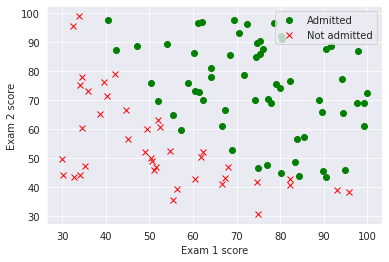

In [4]:
plt.plot(pos['Exam 1 score'], pos['Exam 2 score'], 'go', label='Admitted')
plt.plot(neg['Exam 1 score'], neg['Exam 2 score'], 'rx', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc="upper right")
plt.show()

In [44]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

A logistic function aka a sigmoid function

In [57]:
def CostFunction(theta, X, y):
    m = len(y)
    
    J = 1 / m * (-y.T @ np.log(Sigmoid(X @ theta)) - (1 - y).T @ np.log(1 - Sigmoid(X @ theta)))
    
    return J[0][0]

A log loss aka a cross entropy

In [111]:
X = df.drop('Admitted', axis=1)
y = df[['Admitted']]

Dividing the data set into the X (features) and the y (label)

In [112]:
X['const'] = 1

Adding an intercept term to the data set

In [113]:
X.columns

Index(['Exam 1 score', 'Exam 2 score', 'const'], dtype='object')

In [114]:
columns = [X.columns[2], X.columns[0], X.columns[1]]

X = X.reindex(columns=columns)

In [115]:
X.columns

Index(['const', 'Exam 1 score', 'Exam 2 score'], dtype='object')

In [185]:
def GradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
    
        theta = theta - alpha * (1 / m) * (X.T @ (Sigmoid(X @ theta) - y))

        J_history[i] = CostFunction(theta, X, y)
        
    return theta, J_history

A vanilla gradient descent optimizer function (vectorized)

In [544]:
alpha = 0.001
num_iters = 3000000

In [545]:
theta = np.zeros((X.shape[1], 1))

Initial theta parameters

In [546]:
theta, J_history = GradientDescent(X.values, y.values, theta, alpha, num_iters)

In [583]:
theta

array([[-21.06746245],
       [  0.17350979],
       [  0.16833432]])

The theta parameters after the training session

In [596]:
print(f'A cost at the theta found by the vanilla gradient descent: {J_history[-1][0]}')

A cost at the theta found by the vanilla gradient descent: 0.2063926582991664


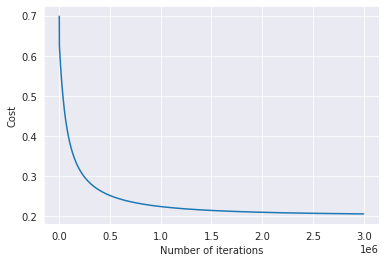

In [597]:
plt.plot(range(num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

In [589]:
x_s = np.array([min(X.iloc[:, 1] - 2), max(X.iloc[:, 1]) + 2])
y_s = (-theta[1] / theta[2] * x_s - theta[0] / theta[2])

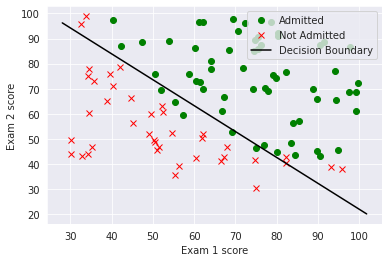

In [594]:
plt.plot(pos['Exam 1 score'], pos['Exam 2 score'], 'go', label='Admitted')
plt.plot(neg['Exam 1 score'], neg['Exam 2 score'], 'rx', label='Not Admitted')
plt.plot(x_s, y_s, label='Decision Boundary', c='k')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc="upper right")
plt.show()

In [569]:
z = X@theta
y_hat = Sigmoid(z)
y_hat = (y_hat >= .5).astype('int')
y_hat.head()

,0
0,0
1,0
2,0
3,1
4,1


In [598]:
accuracy = y_hat.values == y.values
accuracy = sum(accuracy) / len(y)
print(f'Accuracy: {round(accuracy[0] * 100, 2)}%')

Accuracy: 89.0%


In [571]:
tp = sum(y_hat.values * y.values)

tp = True Positives

In [572]:
fp = sum((y_hat.values == 1) * (y.values == 0))

fp = False Positives

In [573]:
precision = tp[0] / (tp[0] + fp[0])
print(f'Precision: {round(precision * 100, 2)}%')

Precision: 90.16%


In [576]:
fn = sum((y_hat.values == 0) * (y.values == 1))
recall = tp[0] / (tp[0] + fn[0])
print(f'Recall: {round(recall * 100, 2)}%')

Recall: 91.67%


fn = False negatives

In [599]:
f1_score = 2 * precision * recall / (precision + recall)
print(f'F1 score: {round(f1_score * 100, 2)}%')

F1 score: 90.91%


Final words: In this example, we were using the same data set for both, training and testing (measuring accuracy) phase. It would be a better idea to randomly split the initial data set into two parts, training and testing subsets. In some cases, there is a need for the third one. Beside training and testing, we'll have a cross-validation subset.